Conclusion: r_value = 0.280818040901 for Gold and Silver price, Which is a lot smaller than GOOG VS APPL. Also, we found a nice statistical test to test for the quality of pairs, call cointegration. Cointegration is a more subtle relationship than correlation. If two time series are cointegrated, there is some linear combination between them that will vary around a mean. That linear combination is the portfolio we construct, and we want that portfolio to move around mean for our pair trading to work. Thus we calculate coint(GOLD, SILVER) = 0.646048908216 for year 2017. 

Then we calculate the coint(AAPL, GOOG) = 0.577151860894 < 0.646048908216. This means that (AAPL, GOOG) pair is more likely to construct a portfolio through linear combination that moves around the mean. Thus we conclude (AAPL, GOOG) is a better pair than (GOLD, SILVER)




In [94]:
import numpy
import pandas
import datetime
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil
import scipy.stats
import pandas as pd
import quandl
import math
from statsmodels.tsa.stattools import coint

In [95]:
ticker_A="GOLD"
ticker_B="SILVER"

In [96]:
quandl.ApiConfig.api_key = 'B-GphJxWUpe-5aUkx71W'


def quandl_stocks(symbol, start_date=(2000, 1, 1), end_date=None):
    """
    symbol is a string representing a stock symbol, e.g. 'AAPL'

    start_date and end_date are tuples of integers representing the year, month,
    and day

    end_date defaults to the current date when None
    """

    query_list = ['WIKI' + '/' + symbol + '.' + str(k) for k in range(1, 13)]

    start_date = datetime.date(*start_date)

    if end_date:
        end_date = datetime.date(*end_date)
    else:
        end_date = datetime.date.today()

    return quandl.get(query_list,
                      returns='pandas',
                      start_date=start_date,
                      end_date=end_date,
                      collapse='Weekly',
                      order='asc'
                      )



In [148]:
# GOLD USD PM Price
data_A = quandl.get("LBMA/GOLD", end_date = "2017-12-25", start_date="2017-1-1")
counter = 0
if i in data_A['USD (AM)']:
    if math.isnan(i):
        data_A.drop(data_A.index[counter], inplace=True)
    counter +=1
data_A

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2017-01-03,1148.65,1151.00,935.12,940.60,1103.28,1109.56
2017-01-04,1165.90,1164.25,949.98,947.70,1117.40,1113.14
2017-01-05,1173.05,1176.70,953.22,955.25,1116.16,1116.69
2017-01-06,1178.00,1175.85,951.35,954.08,1112.27,1114.00
2017-01-09,1176.10,1178.50,968.75,970.85,1118.59,1119.22
2017-01-10,1183.20,1189.50,974.60,978.01,1118.12,1122.65
2017-01-11,1187.55,1178.55,979.25,974.07,1128.41,1125.40
2017-01-12,1206.65,1205.05,984.39,980.67,1135.82,1129.37
2017-01-13,1196.35,1190.35,978.85,981.56,1123.25,1122.50


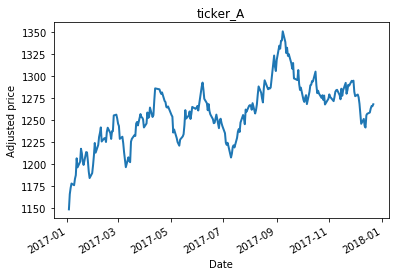

In [149]:
adj_A=pandas.Series(data_A.loc[:,'USD (AM)'],name=ticker_A)
fig, ax = plt.subplots()
plt.plot(adj_A.index,adj_A,label=ticker_A,linewidth=2)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title("ticker_A")
fig.autofmt_xdate()
plt.show()

In [150]:
# SILVER PRICE
data_B = quandl.get("LBMA/SILVER", end_date = "2017-12-25", start_date="2017-1-1")
counter = 0
if i in data_A['USD (PM)']:
    if math.isnan(i):
        data_A.drop(data_A.index[counter], inplace=True)
    counter +=1

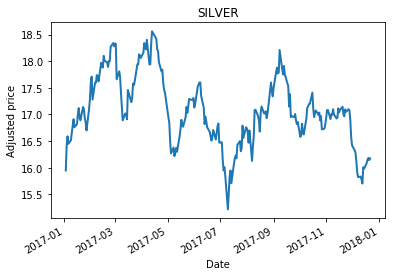

In [151]:
adj_B=pandas.Series(data_B.loc[:,'USD'],name=ticker_A)
fig, ax = plt.subplots()
plt.plot(adj_B.index,adj_B,label=ticker_A,linewidth=2)
plt.ylabel("Adjusted price")
plt.xlabel("Date")
plt.title("SILVER")
fig.autofmt_xdate()
plt.show()

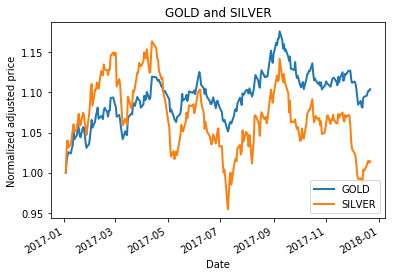

In [152]:
fig, ax = plt.subplots()
normalized_A=adj_A/adj_A.iloc[0]
normalized_B=adj_B/adj_B.iloc[0]

plt_A,=plt.plot(normalized_A.index,normalized_A,label=ticker_A,linewidth=2)
plt_B,=plt.plot(normalized_B.index,normalized_B,label=ticker_B,linewidth=2)
plt.legend(handles=[plt_A,plt_B],loc="lower right")
plt.ylabel("Normalized adjusted price")
plt.xlabel("Date")
plt.title("GOLD"+" and "+"SILVER")
fig.autofmt_xdate()
plt.show()

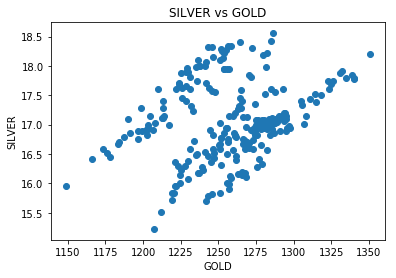

In [155]:
plt.scatter(adj_A,adj_B)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(ticker_B+" vs "+ticker_A)
plt.show()


In [161]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(adj_A,adj_B)
print("slope: "+str(slope))
print("intercept: "+str(intercept))
print("r_value: " + str(r_value))
portfolio=adj_B-adj_A*slope
portfolio.name="Portfolio"
signal=adj_B-(intercept+adj_A*slope)
signal.name="signal"
print(signal.iloc[:10])

slope: 0.00527284822804
intercept: 10.4218414415
r_value: 0.280818040901
Date
2017-01-03   -0.528499
2017-01-04   -0.149455
2017-01-05   -0.017156
2017-01-06   -0.183257
2017-01-09   -0.103238
2017-01-10    0.004325
2017-01-11    0.106388
2017-01-12    0.125676
2017-01-13    0.029987
2017-01-16    0.056240
Name: signal, dtype: float64


In [164]:
# Cointegration test
score, pvalue, _ = coint(normalized_A,normalized_B)
print (pvalue)

0.646048908216


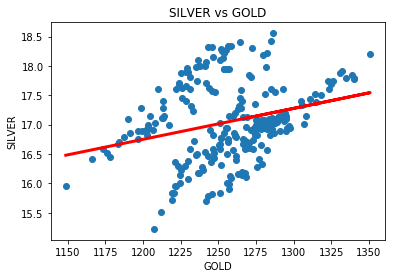

In [165]:
temp=intercept+adj_A*slope
plt.scatter(adj_A,adj_B)
plt.plot(adj_A,temp,color="red",linewidth=3)
plt.xlabel(ticker_A)
plt.ylabel(ticker_B)
plt.title(ticker_B+" vs "+ticker_A)
plt.show()

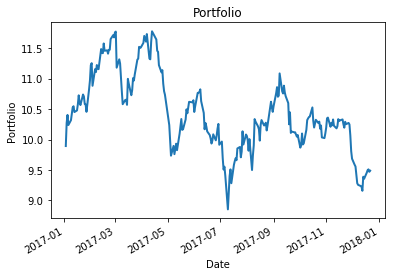

In [166]:
fig, ax = plt.subplots()
plt.plot(portfolio.index,portfolio,label="signal",linewidth=2)
plt.ylabel("Portfolio")
plt.xlabel("Date")
plt.title("Portfolio")
fig.autofmt_xdate()
plt.show()

In [167]:
diff_A=numpy.diff(adj_A)
diff_B=numpy.diff(adj_B)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(diff_A,diff_B)
print(r_value)


0.780137708664


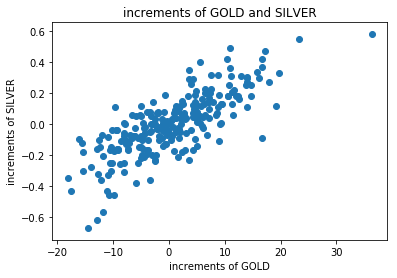

In [168]:
plt.scatter(diff_A,diff_B)
plt.xlabel("increments of "+ticker_A)
plt.ylabel("increments of "+ticker_B)
plt.title("increments of "+ticker_A+" and "+ticker_B)
plt.show()

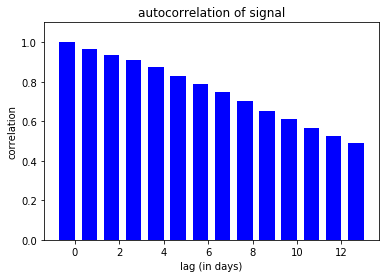

In [169]:
daylag=numpy.arange(14)
acf=numpy.array([portfolio.autocorr(d) for d in daylag])
width=0.7
plt.bar(daylag-width/2, acf, width, color='b')
plt.ylim(0,1.1)
plt.xlabel("lag (in days)")
plt.ylabel("correlation")
plt.title("autocorrelation of signal")
plt.show()

In [170]:
signal_lagged=signal.shift(periods=1)
signal_lagged.name="signal_lagged"
DF=pandas.concat([signal,signal_lagged],axis=1)
print(DF.iloc[:10,:])
DF.dropna(axis=0,inplace=True)
print(DF.iloc[:10,:])

              signal  signal_lagged
Date                               
2017-01-03 -0.528499            NaN
2017-01-04 -0.149455      -0.528499
2017-01-05 -0.017156      -0.149455
2017-01-06 -0.183257      -0.017156
2017-01-09 -0.103238      -0.183257
2017-01-10  0.004325      -0.103238
2017-01-11  0.106388       0.004325
2017-01-12  0.125676       0.106388
2017-01-13  0.029987       0.125676
2017-01-16  0.056240       0.029987
              signal  signal_lagged
Date                               
2017-01-04 -0.149455      -0.528499
2017-01-05 -0.017156      -0.149455
2017-01-06 -0.183257      -0.017156
2017-01-09 -0.103238      -0.183257
2017-01-10  0.004325      -0.103238
2017-01-11  0.106388       0.004325
2017-01-12  0.125676       0.106388
2017-01-13  0.029987       0.125676
2017-01-16  0.056240       0.029987
2017-01-17  0.158466       0.056240


In [171]:
slope_S, intercept_S, r_value_S, p_value_S, std_err_S = scipy.stats.linregress(
    DF.loc[:,"signal_lagged"],DF.loc[:,"signal"])

In [172]:
print("AR slope: "+str(slope_S))
print("AR intercept: "+str(intercept_S))

AR slope: 0.968235332311
AR intercept: -0.00151185164969


In [173]:
noise=DF.loc[:,"signal"]-(intercept_S+DF.loc[:,"signal_lagged"]*slope_S)
print("std of noise: "+str(numpy.std(noise)))
print(noise.iloc[:10])


std of noise: 0.16319028345087067
Date
2017-01-04    0.363768
2017-01-05    0.129064
2017-01-06   -0.165134
2017-01-09    0.075709
2017-01-10    0.105795
2017-01-11    0.103712
2017-01-12    0.024180
2017-01-13   -0.090186
2017-01-16    0.028718
2017-01-17    0.105524
dtype: float64


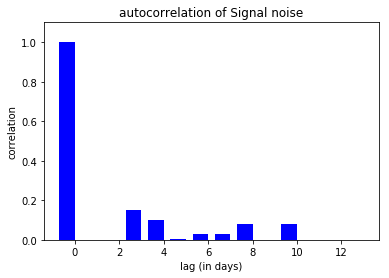

In [174]:
daylag=numpy.arange(14)
acf_noise=numpy.array([noise.autocorr(d) for d in daylag])
width=0.7
plt.bar(daylag-width/2, acf_noise, width, color='b')
plt.ylim(0,1.1)
plt.xlabel("lag (in days)")
plt.ylabel("correlation")
plt.title("autocorrelation of Signal noise")
plt.show()

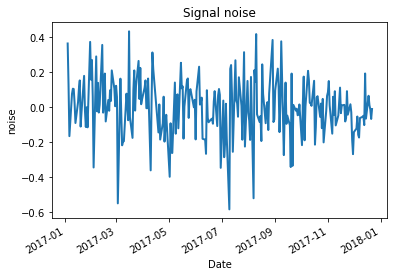

In [175]:
fig, ax = plt.subplots()
plt.plot(noise.index,noise,label="dW",linewidth=2)
plt.ylabel("noise")
plt.xlabel("Date")
plt.title("Signal noise")
fig.autofmt_xdate()
plt.show()

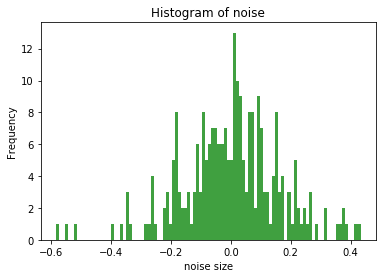

In [176]:
plt.hist(noise, 100, facecolor='green', alpha=0.75)
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Histogram of noise")
plt.show()

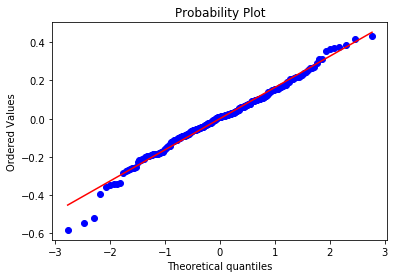

In [177]:
scipy.stats.probplot(numpy.array(noise), dist="norm", plot=plt)
plt.show()

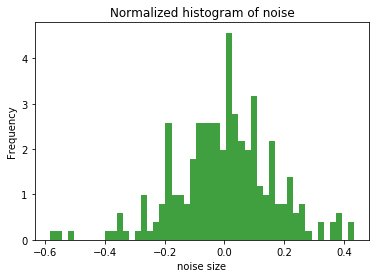

In [178]:
plt.hist(noise, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Normalized histogram of noise")
plt.show()

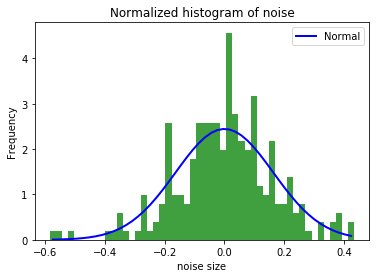

In [179]:
n, bins, patches=plt.hist(noise, 50, normed=True, facecolor='green', 
                          alpha=0.75,label="empirical")

mids=(bins[1:]+bins[:-1])/2
widths=bins[1:]-bins[:-1]

std=numpy.std(noise)
n_heights=(scipy.stats.norm.cdf(bins[1:],scale=std)-
           scipy.stats.norm.cdf(bins[:-1],scale=std))/widths
plt_normal,=plt.plot(mids,n_heights,color='blue',label="Normal",linewidth=2)
plt.legend(handles=[plt_normal],loc="upper right")

plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title("Normalized histogram of noise")
plt.show()



In [180]:
print("slope_S: "+str(slope_S))
print("intercept_S: "+str(intercept_S))
print("noise std: "+str(std))

slope_S: 0.968235332311
intercept_S: -0.00151185164969
noise std: 0.16319028345087067


In [181]:
delta=1/252
print("delta: "+str(delta))
elasticity=(1-slope_S)/delta
print("elasticity: "+str(elasticity))
mean=intercept_S/elasticity/delta
print("mean: "+str(mean))
diff=std/numpy.sqrt(delta)
print("diff: "+str(diff))

delta: 0.003968253968253968
elasticity: 8.00469625763
mean: -0.0475953869403
diff: 2.59056543836


In [182]:
noise.to_pickle("noise.p")